# 2주차 과제

dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기 ex 모델의 hidden layer/neuron 수를 바꾸거나, lr를 바꾸거나, 전처리 등)

: 데이터 분석 목표, auc(정확도), 기존 코드에서 바꿔본 내용

In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
dat_wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
print(dat_wine.head())
dat_wine.columns = ['class label', 'alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline']  # Column names
print('class label:', np.unique(dat_wine['class label']))  # Class 출력
dat_wine.head()

   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  
class label: [1 2 3]


,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X, y = dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
X_train, X_test, y_train,y_test = \
    train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

In [6]:
y_train = y_train - 1
y_test = y_test - 1

In [7]:
print(X_train[0])
print(y_train[0])

tensor([1.4370e+01, 1.9500e+00, 2.5000e+00, 1.6800e+01, 1.1300e+02, 3.8500e+00,
        3.4900e+00, 2.4000e-01, 2.1800e+00, 7.8000e+00, 8.6000e-01, 3.4500e+00,
        1.4800e+03])
tensor(0)


X 변수 13개, y 클래스 3개

In [8]:
model = nn.Sequential(
          nn.Linear(13, 90, bias=True), # input_layer = 13, hidden_layer1 = 90 # 바꿔보기
          nn.Sigmoid(),
          nn.Linear(90, 90, bias=True), # hidden_layer1 = 90, hidden_layer2 = 90
          nn.Sigmoid(),
          nn.Linear(90, 90, bias=True), # hidden_layer2 = 90, hidden_layer3 = 90
          nn.Sigmoid(),
          nn.Linear(90, 90, bias=True), # hidden_layer3 = 90, hidden_layer4 = 90
          nn.Sigmoid(),
          nn.Linear(90, 3, bias=True), # hidden_layer4 = 90, output_layer = 3
          nn.Softmax()
          ).to(device)

In [9]:
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1) # 바꿔보기

In [10]:
losses = []
for epoch in range(100):

    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X_train)

    # 비용 함수
    cost = loss_fn(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item()) # 값만 가져오기 위해서 .item()

    # 10의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 10 == 0:
        print(epoch, cost.item())

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 1.1048017740249634
10 1.0881961584091187
20 1.085466742515564
30 1.0849454402923584
40 1.084738850593567
50 1.0846306085586548
60 1.0845688581466675
70 1.0845314264297485
80 1.0845072269439697
90 1.0844900608062744


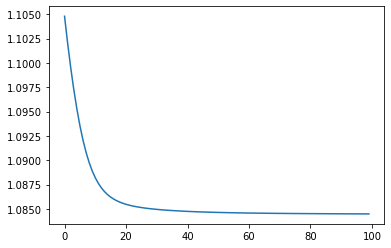

In [11]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [12]:
with torch.no_grad():

    model = model.to('cpu')
    y_pred = model(X_test)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    print(f'model의 output은 :  {y_pred[0]}' )
    print(f'argmax를 한 후의 output은 {predicted[0]}')
    accuracy = (accuracy_score(predicted,y_test))
    print(f'accuracy는 {accuracy}')

model의 output은 :  [0.33392885 0.5344401  0.131631  ]
argmax를 한 후의 output은 1
accuracy는 0.3888888888888889


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
